Import Libraries

In [3]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

Reading Data

In [4]:
df = pd.read_csv('WA_Fn-UseC_-Telco-Customer-Churn.csv')

In [5]:
df.shape

(7043, 21)

In [6]:
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [7]:
df.duplicated().sum()

0

INITIAL DATA FIXING

In [8]:
df['TotalCharges'].describe()

count     7043
unique    6531
top           
freq        11
Name: TotalCharges, dtype: object

In [9]:
df[df['TotalCharges']==' '].head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
488,4472-LVYGI,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,...,Yes,Yes,Yes,No,Two year,Yes,Bank transfer (automatic),52.55,,No
753,3115-CZMZD,Male,0,No,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.25,,No
936,5709-LVOEQ,Female,0,Yes,Yes,0,Yes,No,DSL,Yes,...,Yes,No,Yes,Yes,Two year,No,Mailed check,80.85,,No
1082,4367-NUYAO,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.75,,No
1340,1371-DWPAZ,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,...,Yes,Yes,Yes,No,Two year,No,Credit card (automatic),56.05,,No


In [10]:
#exclude rows with TotalCharges contains with space
#transform TotalCharges col to float
df['TotalCharges'] = df['TotalCharges'].str.strip().replace('', 0).astype('float').copy()
df['TotalCharges'].dtype


dtype('float64')

In [11]:
df.dtypes

customerID           object
gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges        float64
Churn                object
dtype: object

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [13]:
df.isna().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

In [14]:
df.isnull().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

In [15]:
# number of duplicated data
df.duplicated().sum()

0

Perform standard EDA with rich interpretations!

Statistical summary of columns

In [16]:
target = df['Churn'].copy()
target_label = 'Churn'

In [17]:
cats = [col for col in df.columns if (df[col].dtype == 'object') & (col not in ['customerID'])]
nums = [col for col in df.columns if df[col].dtype != 'object']
print(cats)
print(nums)

['gender', 'Partner', 'Dependents', 'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod', 'Churn']
['SeniorCitizen', 'tenure', 'MonthlyCharges', 'TotalCharges']


In [18]:
df[cats].describe()

,gender,Partner,Dependents,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,Churn
count,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043
unique,2,2,2,2,3,3,3,3,3,3,3,3,3,2,4,2
top,Male,No,No,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,No
freq,3555,3641,4933,6361,3390,3096,3498,3088,3095,3473,2810,2785,3875,4171,2365,5174


In [19]:
df[nums].describe()

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges
count,7043.000000,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692,2279.734304
std,0.368612,24.559481,30.090047,2266.794470
min,0.000000,0.000000,18.250000,0.000000
25%,0.000000,9.000000,35.500000,398.550000
50%,0.000000,29.000000,70.350000,1394.550000
75%,0.000000,55.000000,89.850000,3786.600000
max,1.000000,72.000000,118.750000,8684.800000


In [20]:
df['TotalCharges'].value_counts()

0.00       11
20.20      11
19.75       9
20.05       8
19.90       8
           ..
6849.40     1
692.35      1
130.15      1
3211.90     1
6844.50     1
Name: TotalCharges, Length: 6531, dtype: int64

Univariate analysis

In [21]:
import matplotlib.pyplot as plt

In [22]:
nums

['SeniorCitizen', 'tenure', 'MonthlyCharges', 'TotalCharges']

In [23]:
len(nums)

4

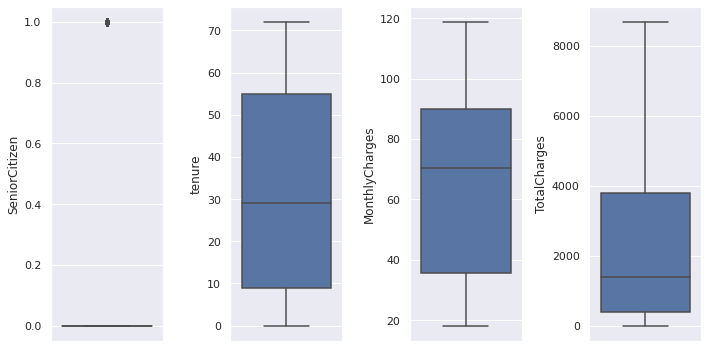

In [24]:
plt.figure(figsize=(10, 5))

for i in range(0, len(nums)):
  plt.subplot(1, len(nums), i+1)
  sns.boxplot(y=df[nums[i]])
  plt.tight_layout()

gender


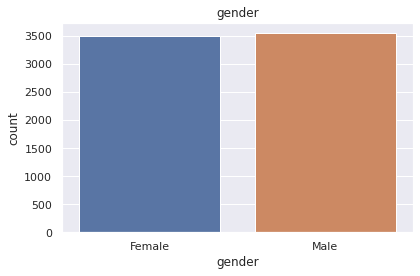

Partner


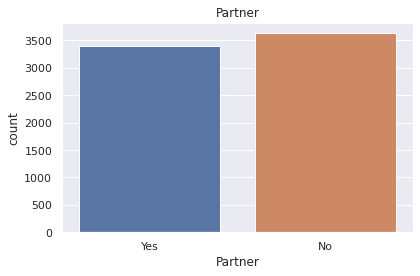

Dependents


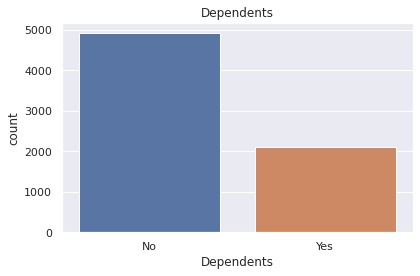

PhoneService


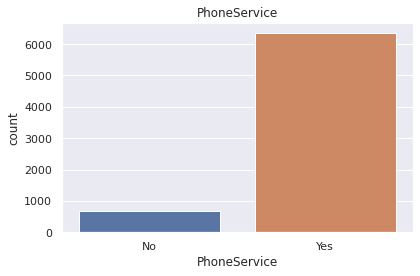

MultipleLines


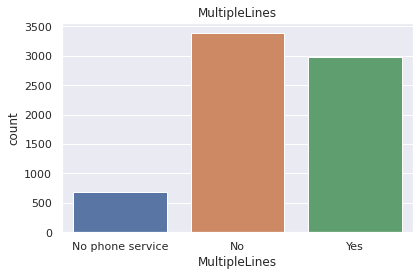

InternetService


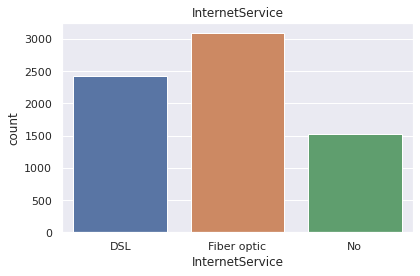

OnlineSecurity


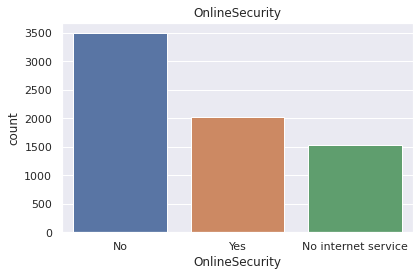

OnlineBackup


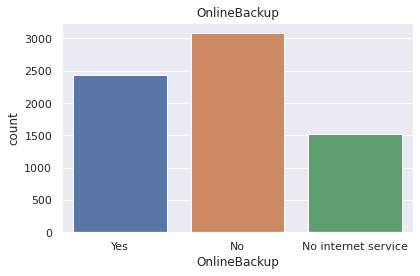

DeviceProtection


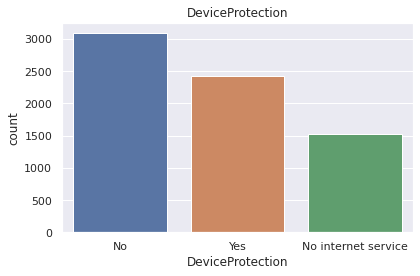

TechSupport


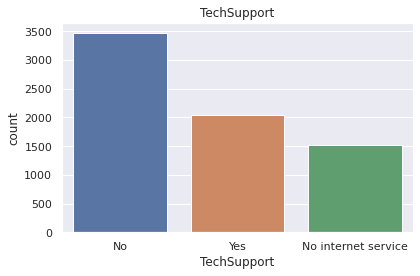

StreamingTV


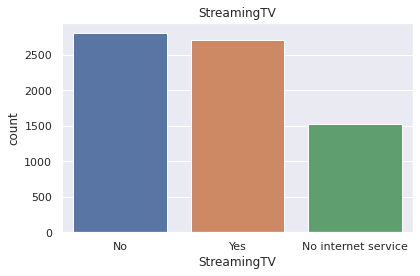

StreamingMovies


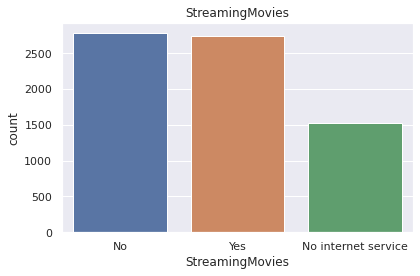

Contract


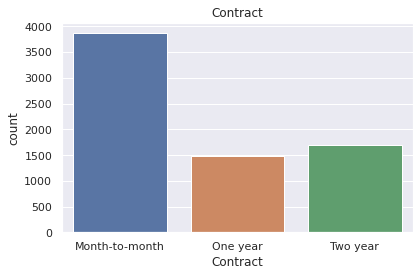

PaperlessBilling


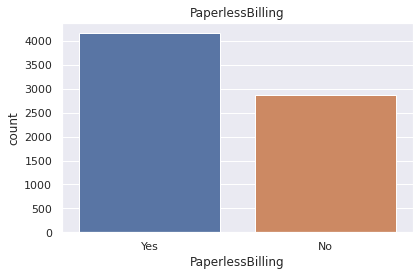

PaymentMethod


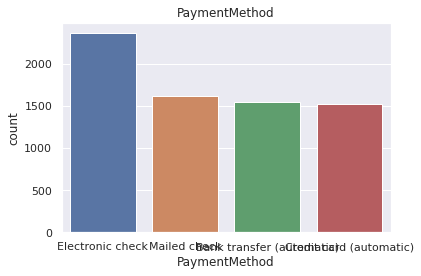

Churn


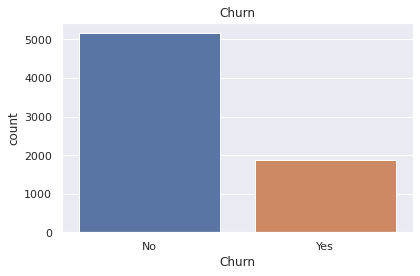

In [25]:
for col in cats:
    print(col)
    sns.countplot(data=df, x=col)
    plt.title(col)
    plt.tight_layout()
    plt.show()

gender


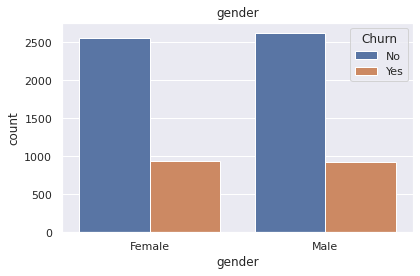

Partner


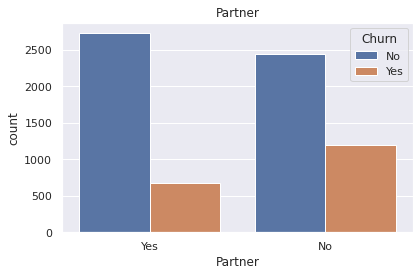

Dependents


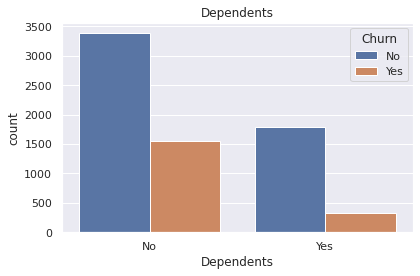

PhoneService


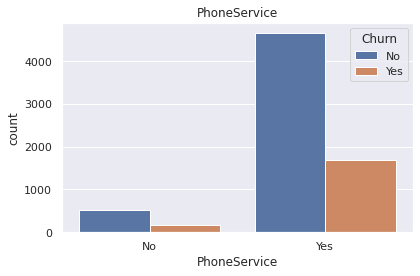

MultipleLines


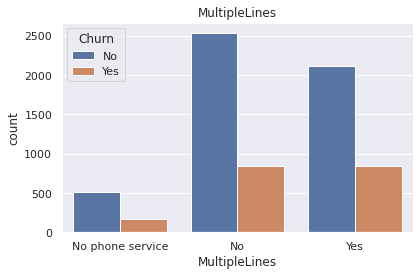

InternetService


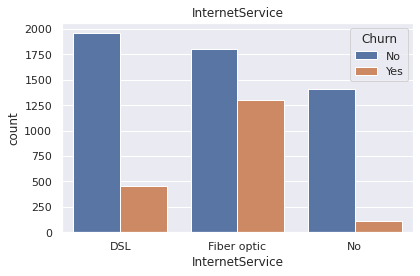

OnlineSecurity


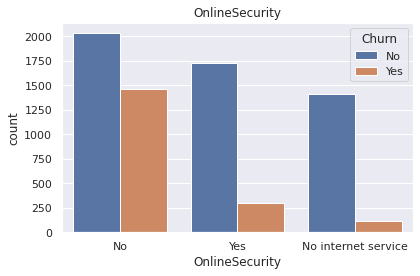

OnlineBackup


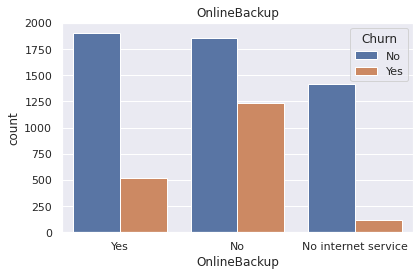

DeviceProtection


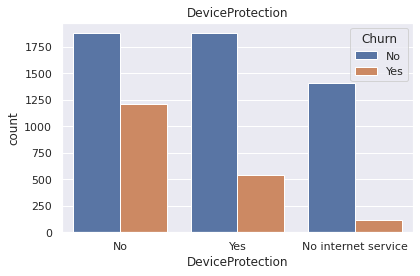

TechSupport


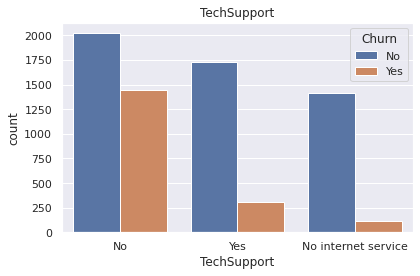

StreamingTV


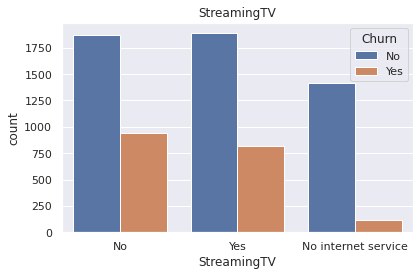

StreamingMovies


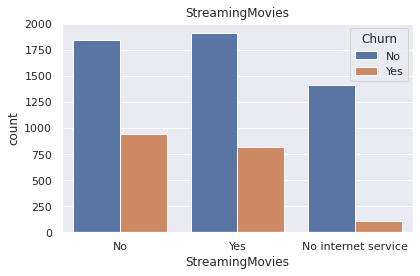

Contract


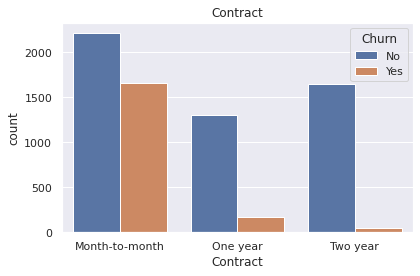

PaperlessBilling


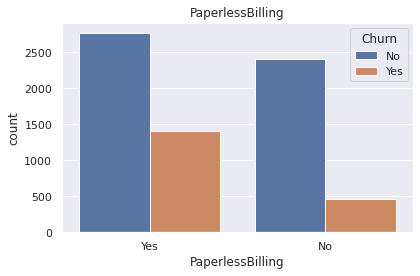

PaymentMethod


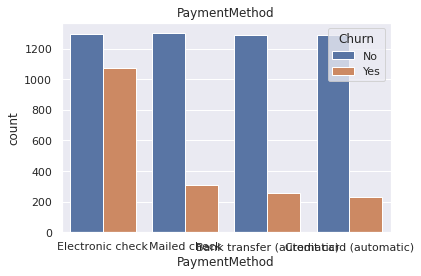

Churn


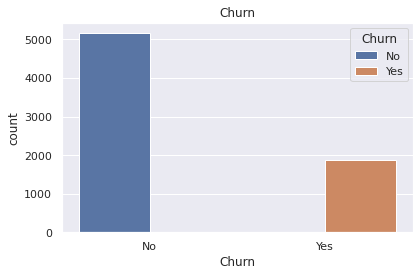

In [26]:
for col in cats:
    print(col)
    sns.countplot(data=df, x=col, hue=target_label)
    plt.title(col)
    plt.tight_layout()
    plt.show()

SeniorCitizen


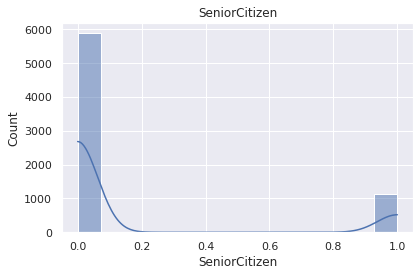

tenure


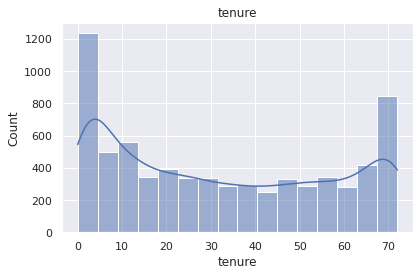

MonthlyCharges


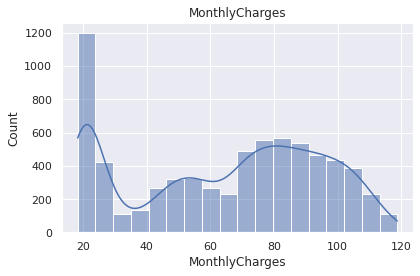

TotalCharges


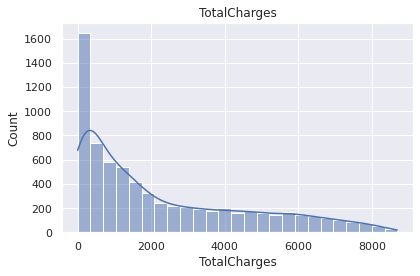

In [27]:
for col in nums:
    print(col)
    sns.histplot(data=df, x=col, kde=True)
    plt.title(col)
    plt.tight_layout()
    plt.show()

SeniorCitizen


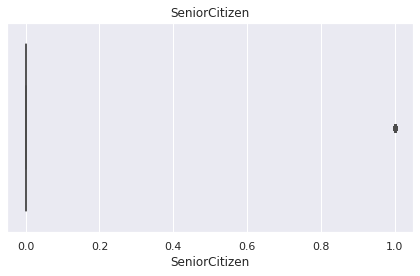

tenure


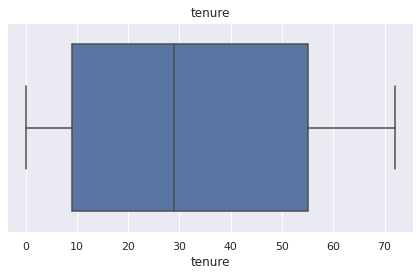

MonthlyCharges


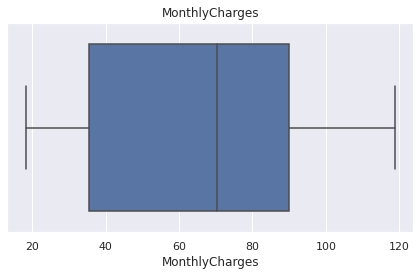

TotalCharges


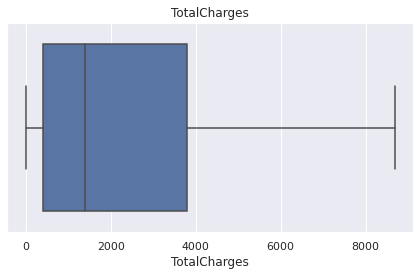

In [28]:
for col in nums:
    print(col)
    sns.boxplot(data=df, x=col)
    plt.title(col)
    plt.tight_layout()
    plt.show()

SeniorCitizen


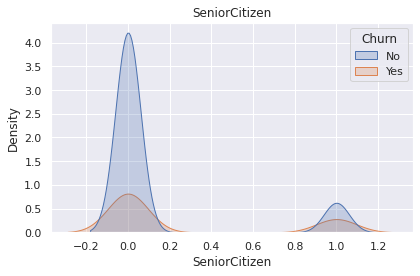

tenure


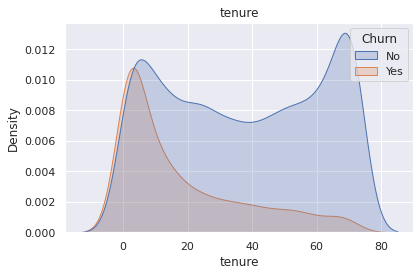

MonthlyCharges


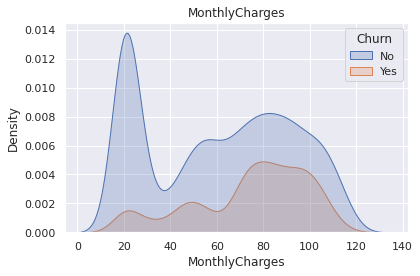

TotalCharges


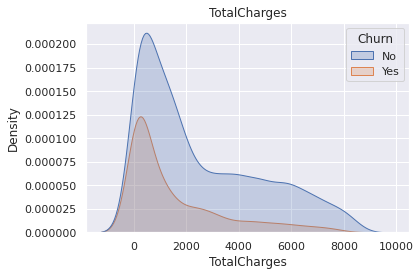

In [29]:
for col in nums:
    print(col)
    sns.kdeplot(data=df, x=col, hue='Churn', fill=True)
    plt.title(col)
    plt.tight_layout()
    plt.show()

SeniorCitizen


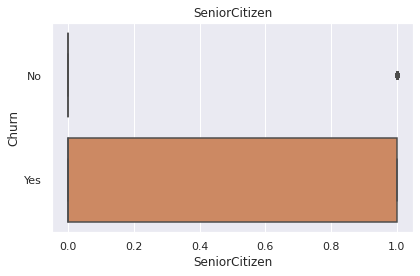

tenure


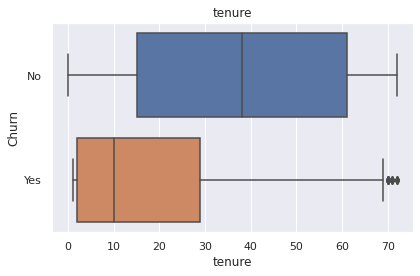

MonthlyCharges


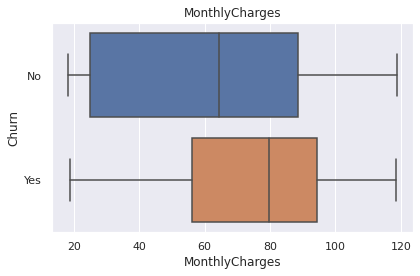

TotalCharges


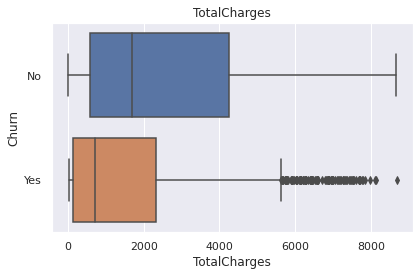

In [30]:
for col in nums:
    print(col)
    sns.boxplot(data=df, x=col, y='Churn')
    plt.title(col)
    plt.tight_layout()
    plt.show()

Multivariate analysis

In [31]:
correlation = df.corr()
correlation

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges
SeniorCitizen,1.000000,0.016567,0.220173,0.103006
tenure,0.016567,1.000000,0.247900,0.826178
MonthlyCharges,0.220173,0.247900,1.000000,0.651174
TotalCharges,0.103006,0.826178,0.651174,1.000000


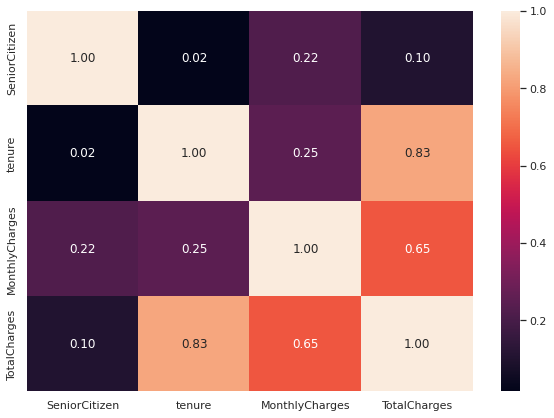

In [32]:
plt.figure(figsize=(10, 7))

sns.heatmap(correlation, annot=True, fmt='.2f')

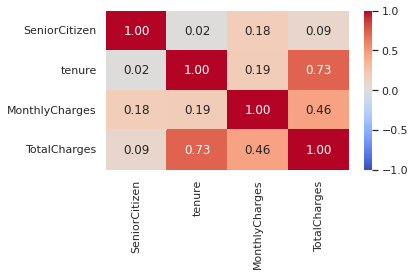

In [33]:
# plt.figure(figsize=(12,12))
ax = sns.heatmap(df.corr(method='kendall'), annot=True, fmt='.2f', vmin=-1, vmax=1, cmap='coolwarm')
plt.tight_layout()
plt.show()

● Perform deep-dive exploration

○ Ask minimum 2 questions

○ At least 1 of them should involve group-by aggregation!

In [35]:
def countplot(data,x,hue=None,ax=None):
    ax = sns.countplot(data=data, x=x, hue=hue,ax=ax)
    
    # Looping over each column
    for patch in ax.patches:
        loc = patch.get_x()
        width = patch.get_width()
        height = patch.get_height()
        
        ax.text(loc+width/2, height, str(height), fontsize=15, weight="bold", ha="center")
    plt.draw()
    ax.set_title(f"{x} Distribution", fontsize=20, color="brown")
    ax.set_xlabel(x, fontsize=20)
    ax.set_xticklabels(ax.get_xticklabels(),fontsize=15,color="brown")
    ax.set_ylabel('Count', fontsize=20)
    ax.set_yticklabels(ax.get_yticklabels(),fontsize=15)
    if hue:
        ax.legend(labels=list(data[hue].unique()),prop = {"size":15} ,frameon=True, shadow=True)

In [37]:
def pieplot(x, labels=None,shadow=False,title_p=None):
    ax = plt.pie(x=x, labels=labels, shadow= shadow,autopct='%1.2f%%',textprops={'fontsize': 14})
    plt.title(f"{title_p}", fontsize=15, color="brown")
    plt.legend()

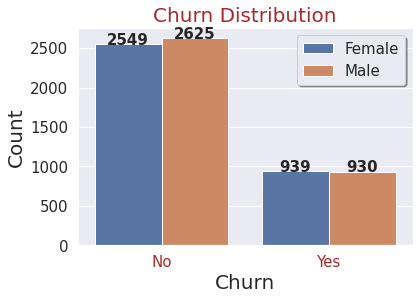

In [50]:
countplot(df,"Churn",hue="gender")

In [43]:
gender_count = df["gender"].value_counts()

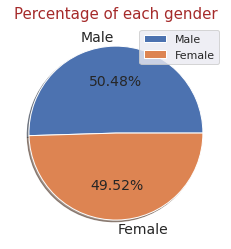

In [51]:
pieplot(gender_count,labels=gender_count.index,shadow=True,title_p="Percentage of each gender")

as we see the percentage between male and female is about the same, The rate of No-Churn is very higher than Churn, There seems to be a slight imbalance in the data.